# 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

# 设置中文字体和图像显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

print("库导入完成")
print(f"TensorFlow版本: {tf.__version__}")

库导入完成
TensorFlow版本: 2.20.0


# 加载数据

加载MNIST数据集...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 8s 1us/step
训练集形状: (60000, 28, 28)
测试集形状: (10000, 28, 28)
像素值范围: [0, 255]


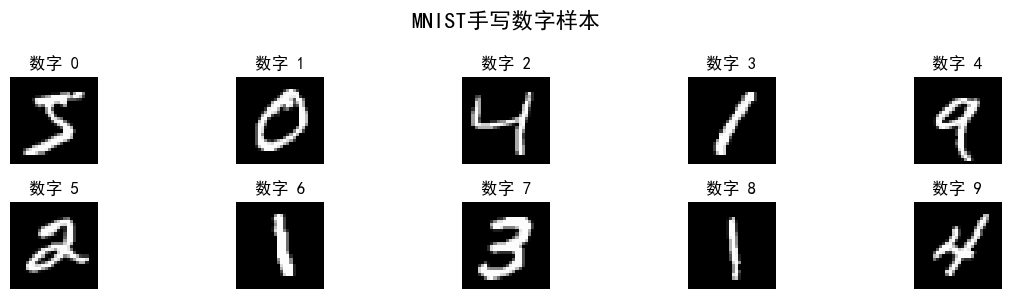

In [2]:
# 1. 加载MNIST数据集
print("加载MNIST数据集...")
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

print(f"训练集形状: {x_train.shape}")
print(f"测试集形状: {x_test.shape}")
print(f"像素值范围: [{x_train.min()}, {x_train.max()}]")

# 显示一些样本图像
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'数字 {i}')
    plt.axis('off')
plt.suptitle('MNIST手写数字样本', fontsize=16)
plt.tight_layout()
plt.show()

# 数据预处理

In [3]:
# 2. 数据预处理
print("数据预处理...")

# 归一化到0-1范围
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 将28x28图像展平为784维向量
x_train_flat = x_train.reshape((len(x_train), 28 * 28))
x_test_flat = x_test.reshape((len(x_test), 28 * 28))

print(f"展平后训练集形状: {x_train_flat.shape}")
print(f"展平后测试集形状: {x_test_flat.shape}")

数据预处理...
展平后训练集形状: (60000, 784)
展平后测试集形状: (10000, 784)


# 构建自编码器模型

In [4]:
# 3. 构建自编码器模型
print("构建自编码器模型...")

input_dim = 28 * 28      # 输入维度
encoding_dim = 32        # 编码维度（压缩到32维）

# 编码器
input_layer = keras.Input(shape=(input_dim,), name='input_layer')
encoded = layers.Dense(encoding_dim, activation='relu', name='encoded_layer')(input_layer)

# 解码器
decoded = layers.Dense(input_dim, activation='sigmoid', name='decoded_layer')(encoded)

# 构建自编码器
autoencoder = keras.Model(input_layer, decoded, name='autoencoder')

print("自编码器模型构建完成!")
autoencoder.summary()

构建自编码器模型...
自编码器模型构建完成!


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoded_layer (Dense)           │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoded_layer (Dense)           │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

# 编译和训练模型

In [5]:
# 4. 编译模型
print("编译模型...")
autoencoder.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['mse']
)

# 5. 训练模型
print("开始训练模型...")
history = autoencoder.fit(
    x_train_flat, x_train_flat,  # 自监督学习：输入=输出
    epochs=15,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_flat, x_test_flat),
    verbose=1
)

print("模型训练完成!")

编译模型...
开始训练模型...
Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2762 - mse: 0.0692 - val_loss: 0.1894 - val_mse: 0.0406
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1705 - mse: 0.0344 - val_loss: 0.1532 - val_mse: 0.0289
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1443 - mse: 0.0259 - val_loss: 0.1342 - val_mse: 0.0228
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1288 - mse: 0.0209 - val_loss: 0.1215 - val_mse: 0.0187
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1183 - mse: 0.0175 - val_loss: 0.1129 - val_mse: 0.0159
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1111 - mse: 0.0153 - val_loss: 0.1068 - val_mse: 0.0140
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1058 - mse: 0.0137 - val_loss: 0.1024 - val_mse: 0.0127
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1020 - mse: 0.0125 - val_loss: 0.0991 - val_mse: 0.0117
Epoch 9/15
235/235 ━━━━━━━━━━━━━━━━━━━

# 可视化训练过程

绘制训练历史...


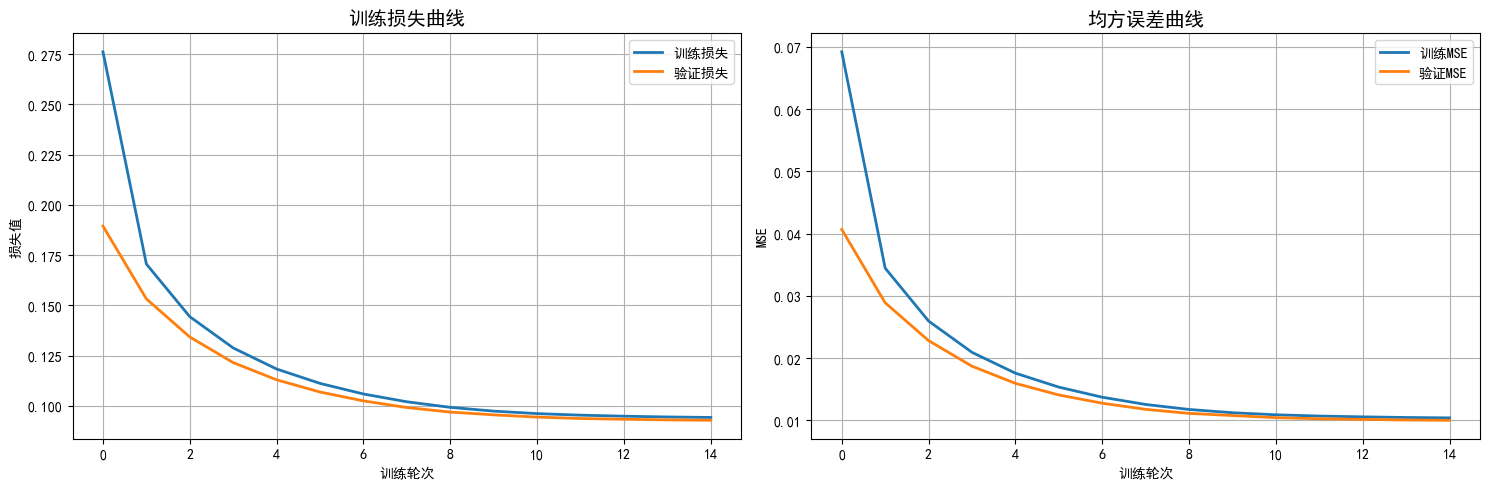

训练历史图表已保存为 'training_history.png'


In [6]:
# 6. 可视化训练过程
print("绘制训练历史...")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 损失曲线
ax1.plot(history.history['loss'], label='训练损失', linewidth=2)
ax1.plot(history.history['val_loss'], label='验证损失', linewidth=2)
ax1.set_title('训练损失曲线', fontsize=14)
ax1.set_xlabel('训练轮次')
ax1.set_ylabel('损失值')
ax1.legend()
ax1.grid(True)

# MSE曲线
ax2.plot(history.history['mse'], label='训练MSE', linewidth=2)
ax2.plot(history.history['val_mse'], label='验证MSE', linewidth=2)
ax2.set_title('均方误差曲线', fontsize=14)
ax2.set_xlabel('训练轮次')
ax2.set_ylabel('MSE')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("训练历史图表已保存为 'training_history.png'")

# 测试重构效果

测试图像重构...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


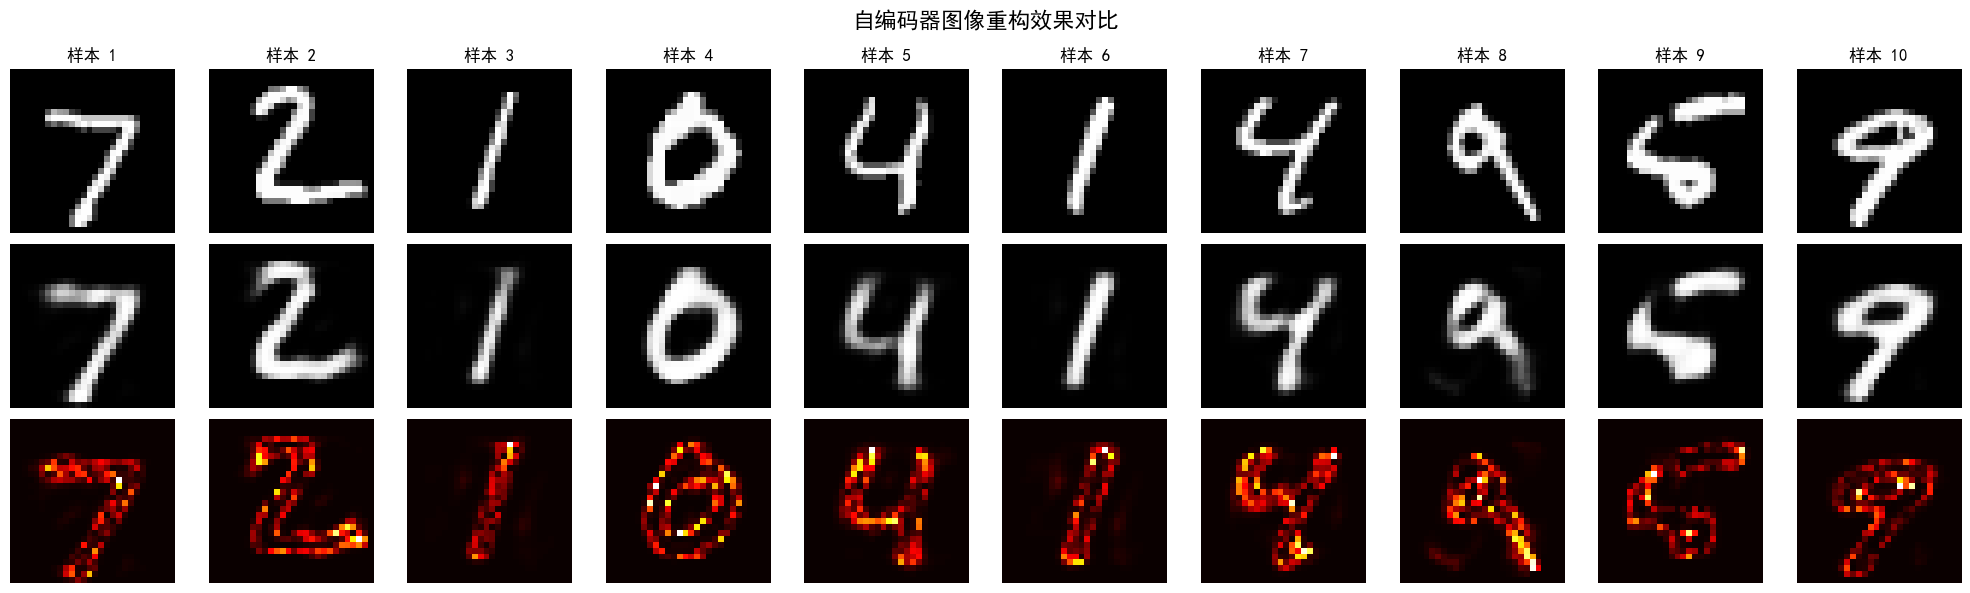

重构对比图已保存为 'reconstruction_comparison.png'


In [7]:
# 7. 测试重构效果
print("测试图像重构...")

# 对测试集进行预测
decoded_imgs = autoencoder.predict(x_test_flat)

# 显示重构对比
n = 10  # 显示10个数字
plt.figure(figsize=(20, 6))

for i in range(n):
    # 原始图像
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_flat[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel("原始图像", fontsize=12, rotation=0, ha='right')
    plt.title(f"样本 {i+1}")
    plt.axis('off')
    
    # 重构图像
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel("重构图像", fontsize=12, rotation=0, ha='right')
    plt.axis('off')
    
    # 差异图像
    ax = plt.subplot(3, n, i + 1 + 2*n)
    difference = np.abs(x_test_flat[i].reshape(28, 28) - decoded_imgs[i].reshape(28, 28))
    plt.imshow(difference, cmap='hot')
    if i == 0:
        plt.ylabel("差异", fontsize=12, rotation=0, ha='right')
    plt.axis('off')

plt.suptitle('自编码器图像重构效果对比', fontsize=16)
plt.tight_layout()
plt.savefig('reconstruction_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("重构对比图已保存为 'reconstruction_comparison.png'")

# 保存模型和总结

In [8]:
# 8. 保存模型和实验总结
print("保存模型...")

# 保存整个模型
autoencoder.save('autoencoder_model.h5')
print("模型已保存为 'autoencoder_model.h5'")

# 实验总结
print("\n" + "="*50)
print("实验总结")
print("="*50)
print(f"数据集: MNIST (60,000训练 + 10,000测试)")
print(f"模型结构: {input_dim} → {encoding_dim} → {input_dim}")
print(f"最终训练损失: {history.history['loss'][-1]:.4f}")
print(f"最终验证损失: {history.history['val_loss'][-1]:.4f}")
print(f"生成文件:")
print("autoencoder_model.h5 (训练好的模型)")
print("training_history.png (训练历史图表)")
print("reconstruction_comparison.png (重构对比图)")
print("="*50)

保存模型...
模型已保存为 'autoencoder_model.h5'

实验总结
数据集: MNIST (60,000训练 + 10,000测试)
模型结构: 784 → 32 → 784
最终训练损失: 0.0942
最终验证损失: 0.0928
生成文件:
autoencoder_model.h5 (训练好的模型)
training_history.png (训练历史图表)
reconstruction_comparison.png (重构对比图)
